## Zadanie 4
### Autorzy:
- Bartosz Durys 229869
- Szymon Klewicki 229911

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

snail_df = pd.read_csv('data.csv', names=columns)
snail_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Wymagania na ocenę dostateczną

In [4]:
# 1. Tabela rozkładu płci

# Zlicz ile jest unikalnych wierszy dla każdej wartości kategorycznej
sex_count_series = snail_df["Sex"].value_counts()

# Policz na podstawie poprzedniej serii frekwencje każdej wartości kategorycznej i zaokrąglij
sex_perc_series = 100 * sex_count_series/sex_count_series.sum()
sex_perc_series = sex_perc_series.round(2)

# Tworzenie DataFrame ze zmianą nazw wierszy
sex_df = pd.DataFrame({
        "count" : sex_count_series.values,
        "%" : sex_perc_series.values
    },
    index=["Male", "Infant", "Female"]
)

sex_df

,count,%
Male,1528,36.58
Infant,1342,32.13
Female,1307,31.29


In [5]:
# 2. Tabela miar rozkładu cech ilościowych

# Wszystkie cechy poza płcią
snail_description_df = snail_df[1:].describe()

# Po transpozycji wyrzuć kolumnę 'count'
snail_description_df = snail_description_df.T.drop(labels='count', axis=1)
snail_description_df

,mean,std,min,25%,50%,75%,max
Length,0.524009,0.120103,0.0750,0.450000,0.54500,0.61500,0.8150
Diameter,0.407892,0.099250,0.0550,0.350000,0.42500,0.48000,0.6500
Height,0.139527,0.041826,0.0000,0.115000,0.14000,0.16500,1.1300
Whole weight,0.828818,0.490424,0.0020,0.441500,0.79975,1.15325,2.8255
Shucked weight,0.359400,0.221980,0.0010,0.186000,0.33600,0.50200,1.4880
Viscera weight,0.180613,0.109620,0.0005,0.093375,0.17100,0.25300,0.7600
Shell weight,0.238852,0.139213,0.0015,0.130000,0.23400,0.32900,1.0050
Rings,9.932471,3.223601,1.0000,8.000000,9.00000,11.00000,29.0000


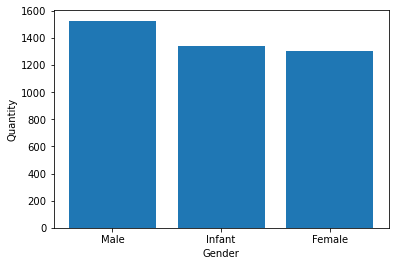

In [6]:
# 3. Wykres słupkowy liczebności poszczególnych wariantów płci

plt.bar(sex_df.index, sex_df["count"])
plt.xlabel("Gender")
plt.ylabel("Quantity")
plt.show()

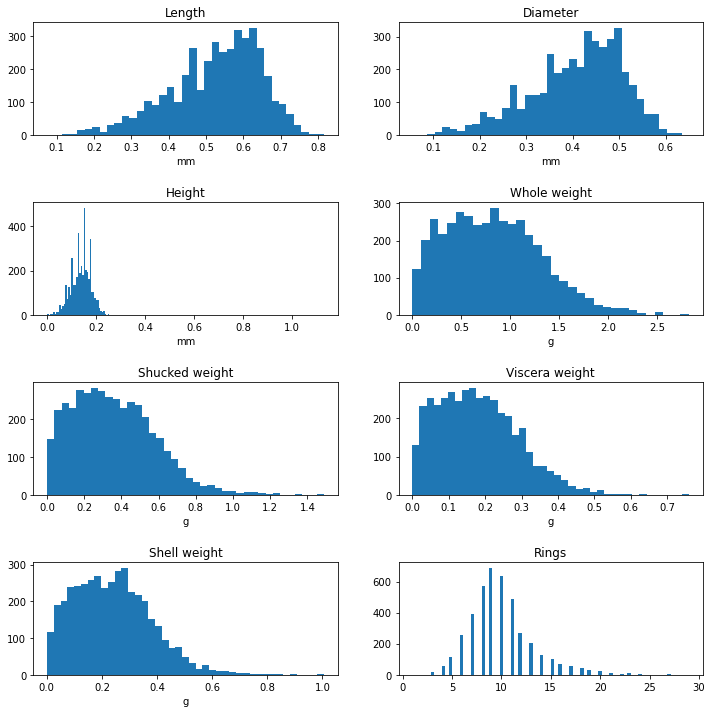

In [7]:
# 4. Histogramy cech ilościowych

# Stwórz obszar wykresów na 4 wiersze i 2 kolumny
fig, ax = plt.subplots(4, 2)

ax_flat = ax.flatten()

units = ['mm']*3 + ['g']*4 + ['']

# Stwórz po kolei histogramy wraz z tytułem i jednostką
for a, c, u in zip(ax_flat, columns[1:], units):
    a.hist(snail_df[c], bins='auto')
    a.set_title(c)
    a.set_xlabel(u)

# Popraw rozmiar i pozycję wykresów
fig.set_size_inches(12, 12)
plt.subplots_adjust(hspace=0.6)

plt.show()

## Wymagania na ocenę dobrą

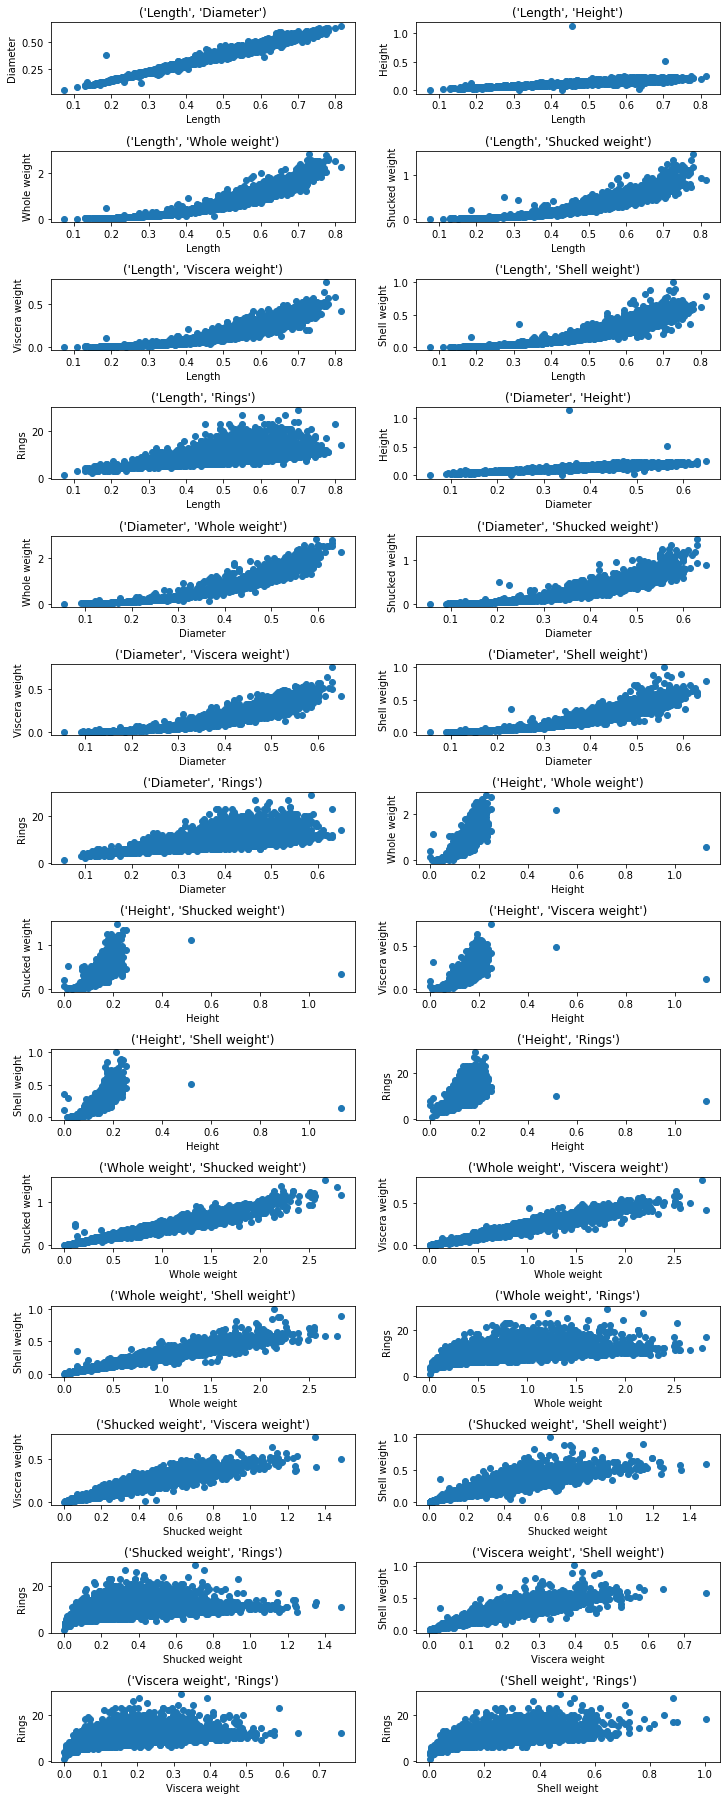

In [8]:
# 2. Dla par cech ilościowych stworzyć wykresy punktowe. Obszar 14x2

# Kombinacje par cech ilościowych
list_of_feature_pairs = list(itertools.combinations(columns[1:], 2))

# Stwórz obszar wykresów na 14 wierszy i 2 kolumny
fig, ax = plt.subplots(14, 2)

ax_flat = ax.flatten()

# Stwórz po kolei wykresy punktowe wraz z tytułem i jednostką
for a, cols in zip(ax_flat, list_of_feature_pairs):
    a.scatter(snail_df[cols[0]], snail_df[cols[1]])
    a.set_title(cols)
    a.set_xlabel(cols[0])
    a.set_ylabel(cols[1])

# Popraw rozmiar i pozycję wykresów
fig.set_size_inches(12, 32)
plt.subplots_adjust(hspace=0.8)

plt.show()

In [9]:
# 3. Macierz korelacji liniowej

# Tworzenie macierzy korelacji
corr = snail_df.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

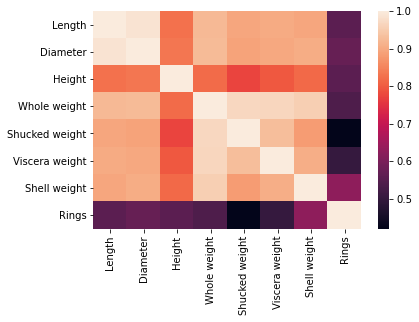

In [10]:
# 4. Wykres macierzy korelacji w postaci mapy cieplnej

sns.heatmap(corr)

<AxesSubplot:xlabel='Length', ylabel='Diameter'>

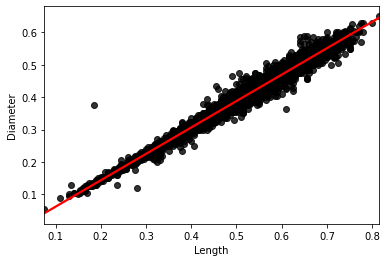

In [11]:
# 5. Wykres regresji liniowej dla cech ilościowych najbardziej skorelowanych

# Dictionary comprehension w celu znalezienia maksymalnej wartości
dict_corr = {(x,y) : corr[x][y] for x, y in list_of_feature_pairs}

# Index słownika o największej wartości
max_corr_features_idx = np.argmax(dict_corr.values())

# Nazwy cech najbardziej skorelowanych liniowo
max_corr_featrues = list(dict_corr.keys())[max_corr_features_idx]

sns.regplot(x=max_corr_featrues[0], y=max_corr_featrues[1], data=snail_df,
           scatter_kws={"color": "black"}, line_kws={"color": "red"})

## Wymagania na ocenę bardzo dobrą

In [12]:
# 2. Tabela miar rozkładów cech ilościowych z podziałem na płeć

# Stwórz opis poszczególnych cech ilościowych pogrupowany na płeć
feature_descriptions_multicol = snail_df.groupby("Sex").describe()

# Zmień nazwy poszczególnych indexów na odpowiednie
feature_descriptions_multicol.index = ["Female", "Infant", "Male"]

# Złącz wszytskie DataFrame'y kolejnych cech opisami i usuń kolumnę liczby obserwacji
feature_descriptions_long = pd.concat([
        feature_descriptions_multicol[c] for c in columns[1:]
    ], 
    axis=0
).drop(labels='count', axis=1)

# Stwórz dwie listy, które tworzą pożądane multiindexy 
multiindexes = [
    np.array([
        [c]*len(feature_descriptions_multicol.index) for c in columns[1:]
    ]).flatten(),
    np.array([
            g for g in feature_descriptions_multicol.index
        ] * len(columns[1:])
    )
]

# Stwórz końcowy DataFrame rozkładu
feature_descriptions_multiind = pd.DataFrame(
    index=multiindexes, 
    data=feature_descriptions_long.values, 
    columns=feature_descriptions_long.columns
)

# Nazwij kolumny indexów
feature_descriptions_multiind.index.names = ['Feature', 'Sex']
feature_descriptions_multiind

mean       std     min       25%       50%  \
Feature        Sex                                                       
Length         Female   0.579093  0.086160  0.2750  0.525000   0.59000   
               Infant   0.427746  0.108858  0.0750  0.360000   0.43500   
               Male     0.561391  0.102697  0.1550  0.505000   0.58000   
Diameter       Female   0.454732  0.070954  0.1950  0.410000   0.46500   
               Infant   0.326494  0.088109  0.0550  0.270000   0.33500   
               Male     0.439287  0.084398  0.1100  0.395000   0.45500   
Height         Female   0.158011  0.039984  0.0150  0.140000   0.16000   
               Infant   0.107996  0.031995  0.0000  0.085000   0.11000   
               Male     0.151381  0.034804  0.0250  0.130000   0.15500   
Whole weight   Female   1.046532  0.430316  0.0800  0.730000   1.03850   
               Infant   0.431363  0.286275  0.0020  0.205500   0.38400   
               Male     0.991459  0.470581  0.0155  0.671625   0.97575   
Shucked weight Female   0.446188  0.198663  0.0310  0.295000   0.44050   
               Infant   0.191035  0.128405  0.0010  0.090000   0.16975   
               Male     0.432946  0.223000  0.0065  0.276375   0.42175   
Viscera weight Female   0.230689  0.097617  0.0210  0.159000   0.22400   
               Infant   0.092010  0.062536  0.0005  0.042500   0.08050   
               Male     0.215545  0.104919  0.0030  0.145875   0.21000   
Shell weight   Female   0.302010  0.125649  0.0250  0.213250   0.29500   
               Infant   0.128182  0.084927  0.0015  0.064125   0.11300   
               Male     0.281969  0.130834  0.0050  0.190000   0.27600   
Rings          Female  11.129304  3.104256  5.0000  9.000000  10.00000   
               Infant   7.890462  2.511554  1.0000  6.000000   8.00000   
               Male    10.705497  3.026349  3.0000  9.000000  10.00000   

                             75%      max  
Feature        Sex                         
Length         Female   0.640000   0.8150  
               Infant   0.510000   0.7250  
               Male     0.630000   0.7800  
Diameter       Female   0.505000   0.6500  
               Infant   0.390000   0.5500  
               Male     0.500000   0.6300  
Height         Female   0.175000   1.1300  
               Infant   0.130000   0.2200  
               Male     0.175000   0.5150  
Whole weight   Female   1.320250   2.6570  
               Infant   0.599375   2.0495  
               Male     1.265625   2.8255  
Shucked weight Female   0.573250   1.4880  
               Infant   0.270375   0.7735  
               Male     0.566000   1.3510  
Viscera weight Female   0.297250   0.5900  
               Infant   0.130000   0.4405  
               Male     0.278000   0.7600  
Shell weight   Female   0.375000   1.0050  
               Infant   0.178500   0.6550  
               Male     0.355500   0.8970  
Rings          Female  12.000000  29.0000  
               Infant   9.000000  21.0000  
               Male    12.000000  27.0000

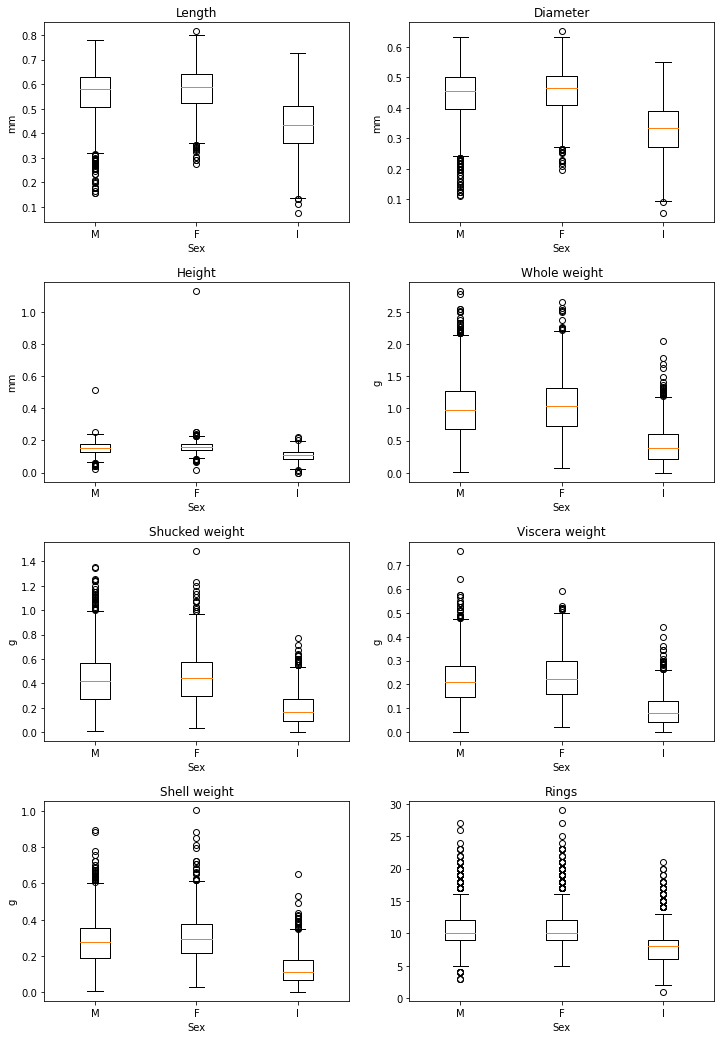

In [13]:
# 3. Wykresy pudłekowe cech ilościowych z podziałem na płeć, wspólny obszar 4x2 

# Stworzenie tabeli zaindeksowanej płcią
features_sex_indexed = snail_df.set_index("Sex")

# Nazwy płci
sex_names = features_sex_indexed.index.unique()

# Stwórz obszar wykresów na 4 wierszy i 2 kolumny
fig, ax = plt.subplots(4, 2)

ax_flat = ax.flatten()

# Stwórz po kolei wykresy pudełkowe cech z podziałem na płeć wraz z tytułem i jednostką
features_sex_list = list(features_sex_indexed.iteritems())
for a, table, u in zip(ax_flat, features_sex_list, units):
    a.boxplot(
        [table[1].loc[sex] for sex in sex_names]
    )
    a.set_title(table[0])
    a.set_xticklabels(sex_names)
    a.set_xlabel("Sex")
    a.set_ylabel(u)

# Popraw rozmiar i pozycję wykresów
fig.set_size_inches(12, 18)
plt.subplots_adjust(hspace=0.3)

plt.show()